# 소셜 네트워크 분석
--------------------------------------



## 1. 소셜 네트워크 분석 예제 실습

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)
import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
from subprocess import check_output
import matplotlib.pyplot as plt

### 1.1. featuring 분석

In [19]:
featuring_df = pd.read_csv("C:/Users/user/Desktop/강의자료 모음/20-2학기/비즈니스 애널리틱스(캡스톤디자인)/실습자료/featuring.csv", encoding='CP949')
featuring_df

,from,to
0,아이유,G-DRAGON
1,에픽하이,아이유
2,에픽하이,오혁
3,아이유,오혁
4,HIGH4,아이유
5,에픽하이,MINO
6,에픽하이,사이먼 도미닉
7,에픽하이,더콰이엇
8,에픽하이,수현
9,MINO,사이먼 도미닉


In [20]:
featuring_df.describe()

,from,to
count,12,12
unique,5,7
top,에픽하이,더콰이엇
freq,6,3


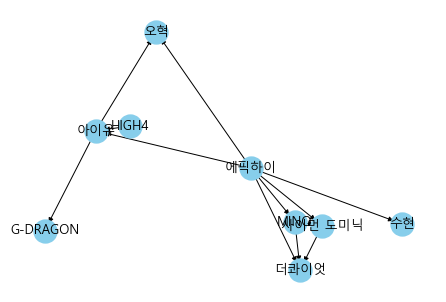

In [58]:
# 피처링을 의뢰한 가수들 간 방향성 그래프를 그려주었다.
# nx.Graph() 방향성이 없는 그래프
# nx.DiGraph() 방향성이 있는 그래프
f_graph = nx.from_pandas_edgelist(featuring_df, 'from', 'to', create_using = nx.DiGraph())
nx.draw(f_graph, node_size=300, node_color="skyblue", linewidths=7, with_labels=True, font_family=font_name,font_size=13)
# 에픽하이가 피처링을 가장 많이 부탁하였고, 더콰이엇은 사람들을 모으는 인플루언서라는 걸 알 수 있다.

### 1.2. 지하철 호선

In [24]:
subway_df = pd.read_csv("C:/Users/user/Desktop/강의자료 모음/20-2학기/비즈니스 애널리틱스(캡스톤디자인)/실습자료/subway.csv", encoding='CP949')
subway_df.head(10)

,from,to,line
0,소요산,동두천,1
1,동두천,보산,1
2,보산,동두천중앙,1
3,동두천중앙,지행,1
4,지행,덕정,1
5,덕정,덕계,1
6,덕계,양주,1
7,양주,녹양,1
8,녹양,가능,1
9,가능,의정부,1


In [25]:
# 1호선인 것만 뽑아서 어느 역을 거쳐가는지 알아보기. 중심성이 어디인가.
# 왕십리를 거쳐가는 호선이 가장 많다.
# 1호선 역의 수가 97개로 가장 많다.
subway_df.describe()

,from,to,line
count,696,696,696
unique,587,594,22
top,왕십리,공덕,1
freq,4,4,97


In [148]:
s = nx.DiGraph()

In [149]:
s = nx.from_pandas_edgelist(subway_df, source='from', target='to')
print(nx.info(s))

Name: 
Type: Graph
Number of nodes: 605
Number of edges: 689
Average degree:   2.2777


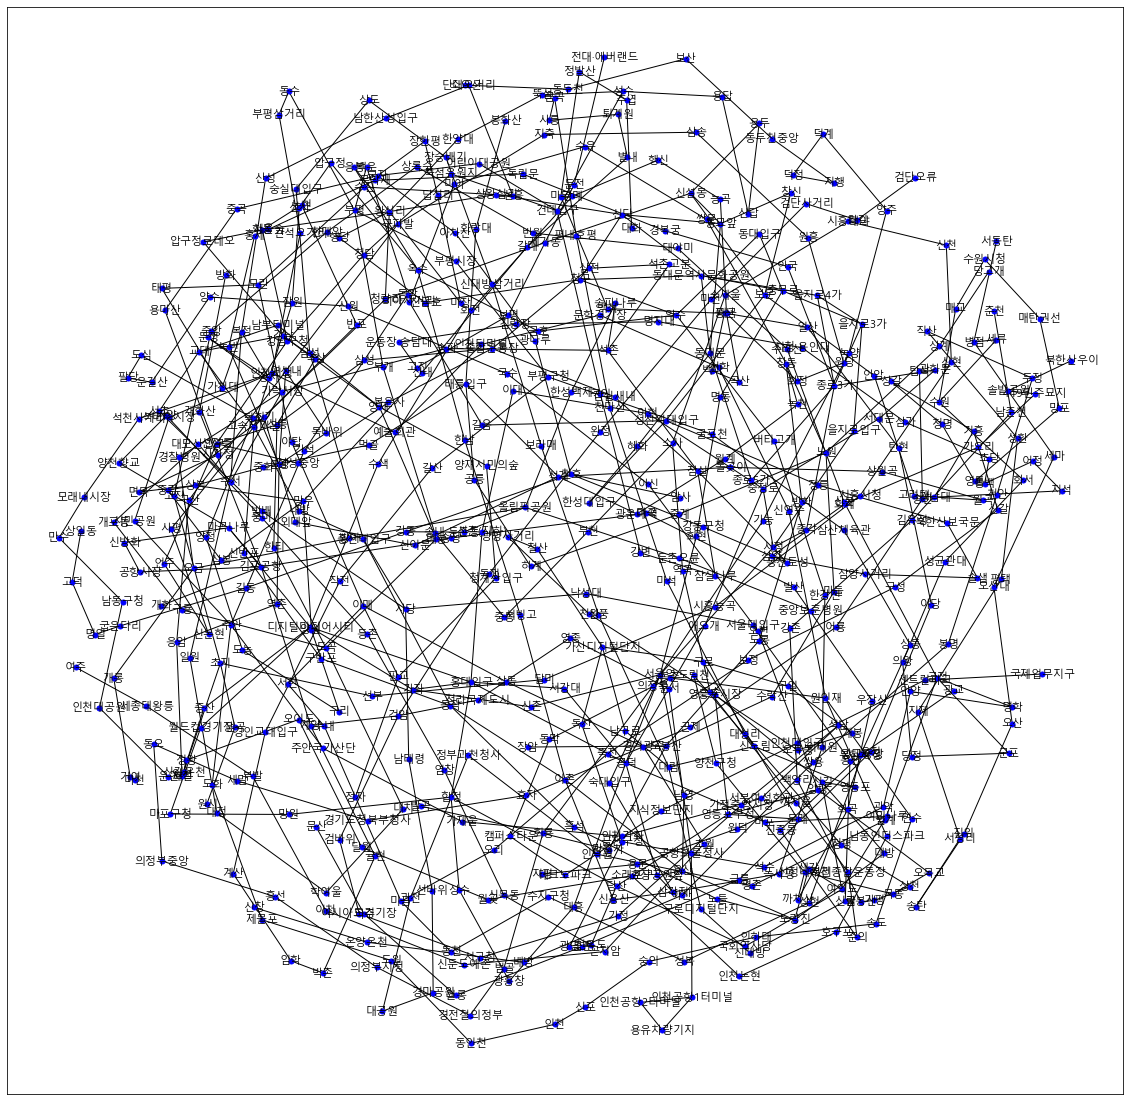

In [150]:
# 대한민국 지하철 노선도를 네트워크화해봤다.
plt.figure(figsize=(20,20))
pos=nx.spring_layout(s, k=0.15)
nx.draw_networkx(s,pos,node_size=25,node_color='blue', font_family=font_name,font_size=11)
plt.show()

### 1.3. kovo

In [34]:
kovo_df = pd.read_csv("C:/Users/user/Desktop/강의자료 모음/20-2학기/비즈니스 애널리틱스(캡스톤디자인)/실습자료/kovo.csv", encoding='CP949')
kovo_df.head(20)

,선수,고교,대학
0,곽승석,동성고,경기대
1,김학민,수성고,경희대
2,심홍석,경북사대부고,홍익대
3,정지석,송림고,NaN
4,임동혁,제천산업고,NaN
5,김규민,벌교상고,경기대
6,조재영,성지고,홍익대
7,진상헌,운일고,한양대
8,진성태,광주전자공고,경희대
9,한선수,영생고,한양대


In [35]:
# 성균관대를 졸업한 선수들이 많다.

kovo_df.describe()

,선수,고교,대학
count,101,101,95
unique,101,28,11
top,진상헌,송림고,성균관대
freq,1,13,17


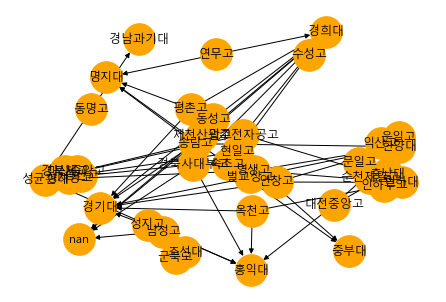

In [36]:
# 선수들의 출신고교와 대학교
# 선수 중에 어느 대학 출신이 많은지 나타냈다.

k_graph = nx.from_pandas_edgelist(kovo_df, '고교', '대학', create_using = nx.DiGraph())
nx.draw(k_graph, node_size=1000,node_color="orange", linewidths=1, with_labels=True, font_family=font_name,font_size=12)


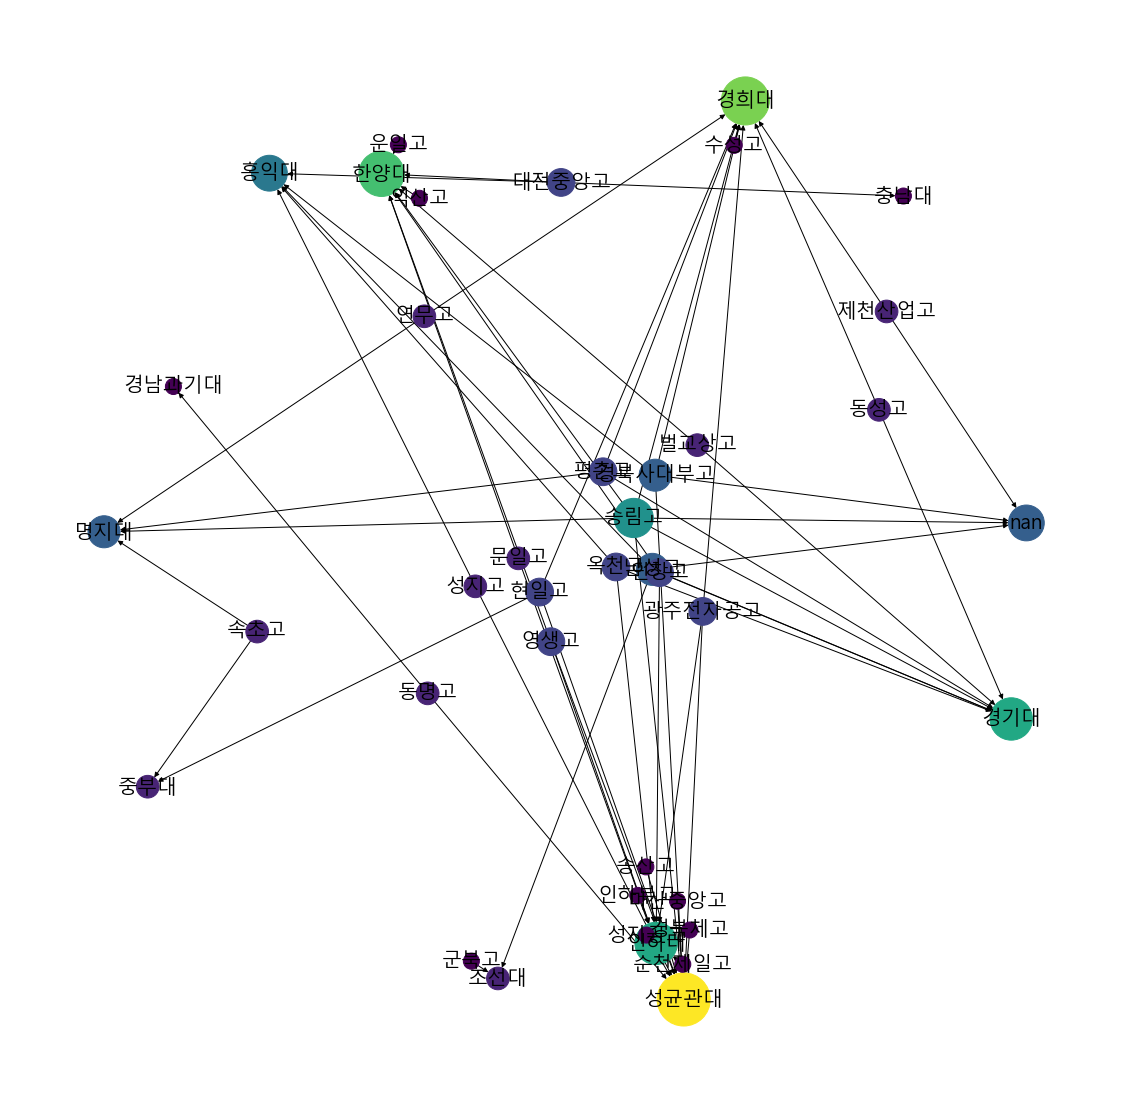

In [44]:
# 성균관대의 연결 정도 중심성(Degree Centrality)이 가장 큰 것으로 나타났다.
# 즉, 현직 선수들은 성균관대 체육 관련 학과를 나온 후 선수가 된 경우가 많다.
# 고등학교는 송림고 출신이 가장 많다.

pos = nx.spring_layout(k_graph)
kCent = nx.betweenness_centrality(k_graph, normalized=True, endpoints=True)
node_color = [20000.0 * k_graph.degree(v) for v in k_graph]
node_size =  [v * 400000 for v in kCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(k_graph, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size, 
                 font_family=font_name,font_size=20)
plt.axis('off');

- 성균관대의 연결 정도 중심성(Degree Centrality)이 가장 큰 것으로 나타났다.
- 즉, 현직 선수들은 성균관대 체육 관련 학과를 나온 후 선수가 된 경우가 많다.
- 고등학교는 송림고 출신이 가장 많다.


------------------------

## 2. 개인 분석
- 국내 항공사들의 운항 현황의 네트워크를 나타내고자 합니다.
- 국내 크라우드펀딩 사이트 "와디즈"의 펀딩 성공률과 카테고리의 연관성을 나타내보고자 합니다.
- 위 항목들은 직접 수집한 데이터로 실습하였습니다.
- 매개 중심성을 네트워크로 시각화하고자 합니다. 
- 중심성이 큰 항목일수록 노드 크기와 색깔 부분에서 차별성을 나타내려 합니다.

### 2.1. 공항별 항공노선

In [4]:
air_df = pd.read_csv("C:/Users/user/Desktop/강의자료 모음/20-2학기/비즈니스 애널리틱스(캡스톤디자인)/한국공항공사_공항별 항공노선_20200507.csv", encoding='CP949')
air_df.head(10)

,연번,항공사,취항도시
0,1,대한항공,서울
1,2,대한항공,부산
2,3,대한항공,제주
3,4,대한항공,대구
4,5,대한항공,청주
5,6,대한항공,광주
6,7,대한항공,여수
7,8,대한항공,울산
8,9,대한항공,사천
9,10,대한항공,포항


In [6]:
a = nx.DiGraph()

In [7]:
a = nx.from_pandas_edgelist(air_df, source='취항도시', target='항공사')
print(nx.info(a))

Name: 
Type: Graph
Number of nodes: 25
Number of edges: 52
Average degree:   4.1600


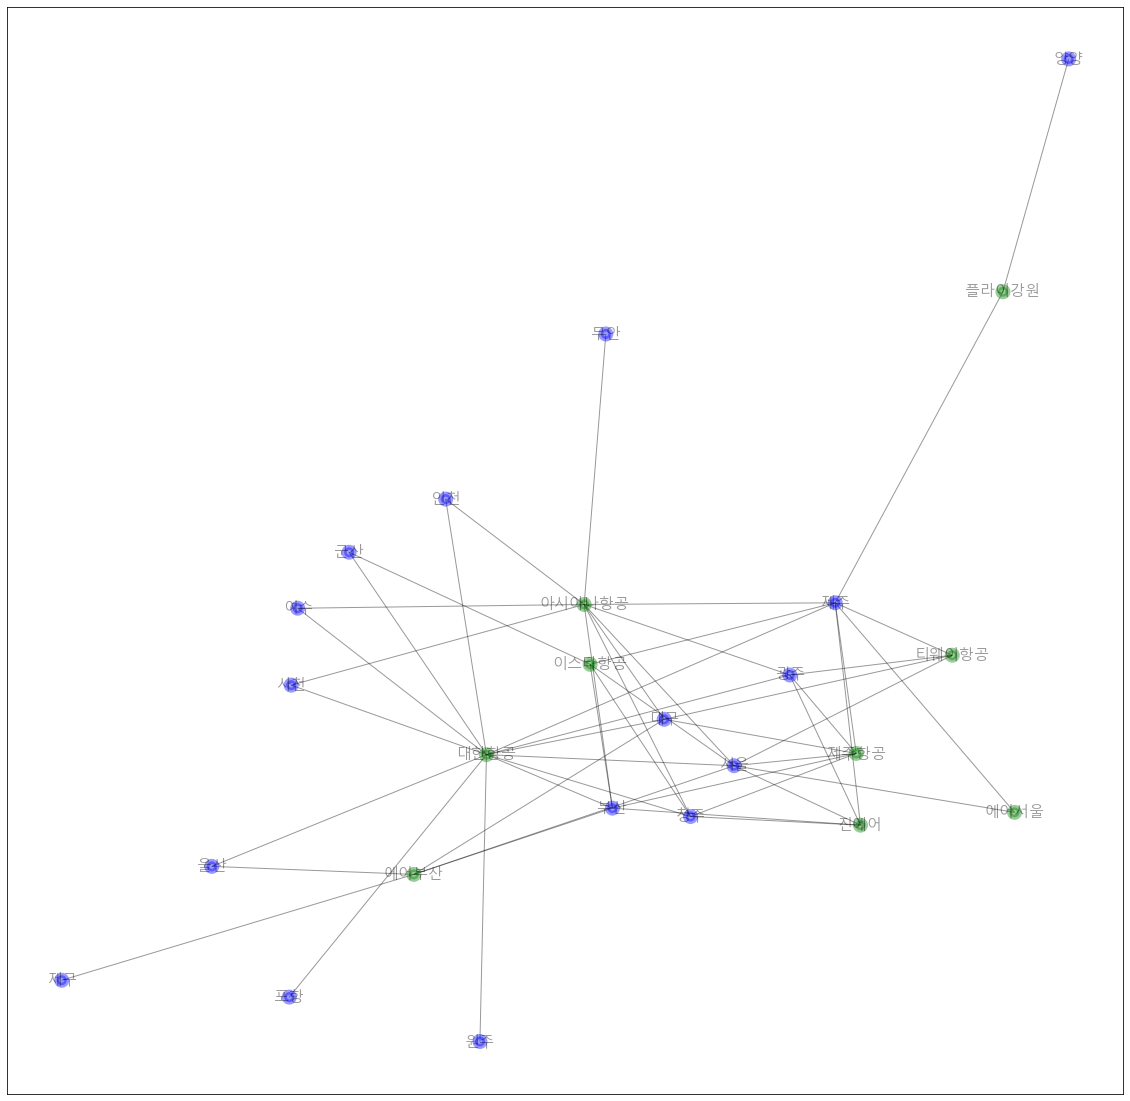

In [8]:
# 항공사와 취항도시의 구분을 용이하게 하기 위해 다른 색깔을 지정했다.

colors = []

for node in a:
    if node in air_df["취항도시"].values:
        colors.append("blue")
    else: colors.append("green")

plt.figure(figsize=(20,20))
pos=nx.spring_layout(a, k=0.15)
nx.draw_networkx(a,pos,node_size=100,node_color=colors, font_family=font_name, font_size=15, alpha=0.4, linewidths=5)
plt.show()

In [15]:
airCent = nx.betweenness_centrality(a, normalized=True, endpoints=True)
airCent

{'서울': 0.2037951226619958,
 '대한항공': 0.43984770040188004,
 '부산': 0.14500252768673821,
 '제주': 0.29643819126636467,
 '대구': 0.12968594122309293,
 '청주': 0.1063235672136601,
 '광주': 0.1071602642856513,
 '여수': 0.08329059829059829,
 '울산': 0.09109710550887021,
 '사천': 0.08329059829059829,
 '포항': 0.08,
 '군산': 0.08395881861516537,
 '원주': 0.08,
 '인천': 0.0832905982905983,
 '아시아나항공': 0.2651499366360048,
 '무안': 0.08,
 '제주항공': 0.11046739695346505,
 '진에어': 0.09966419614097632,
 '에어부산': 0.1723767521894457,
 '제구': 0.08,
 '이스타항공': 0.11250464064086355,
 '티웨이항공': 0.09405100168722459,
 '에어서울': 0.08260504201680673,
 '플라이강원': 0.15666666666666668,
 '양양': 0.08}

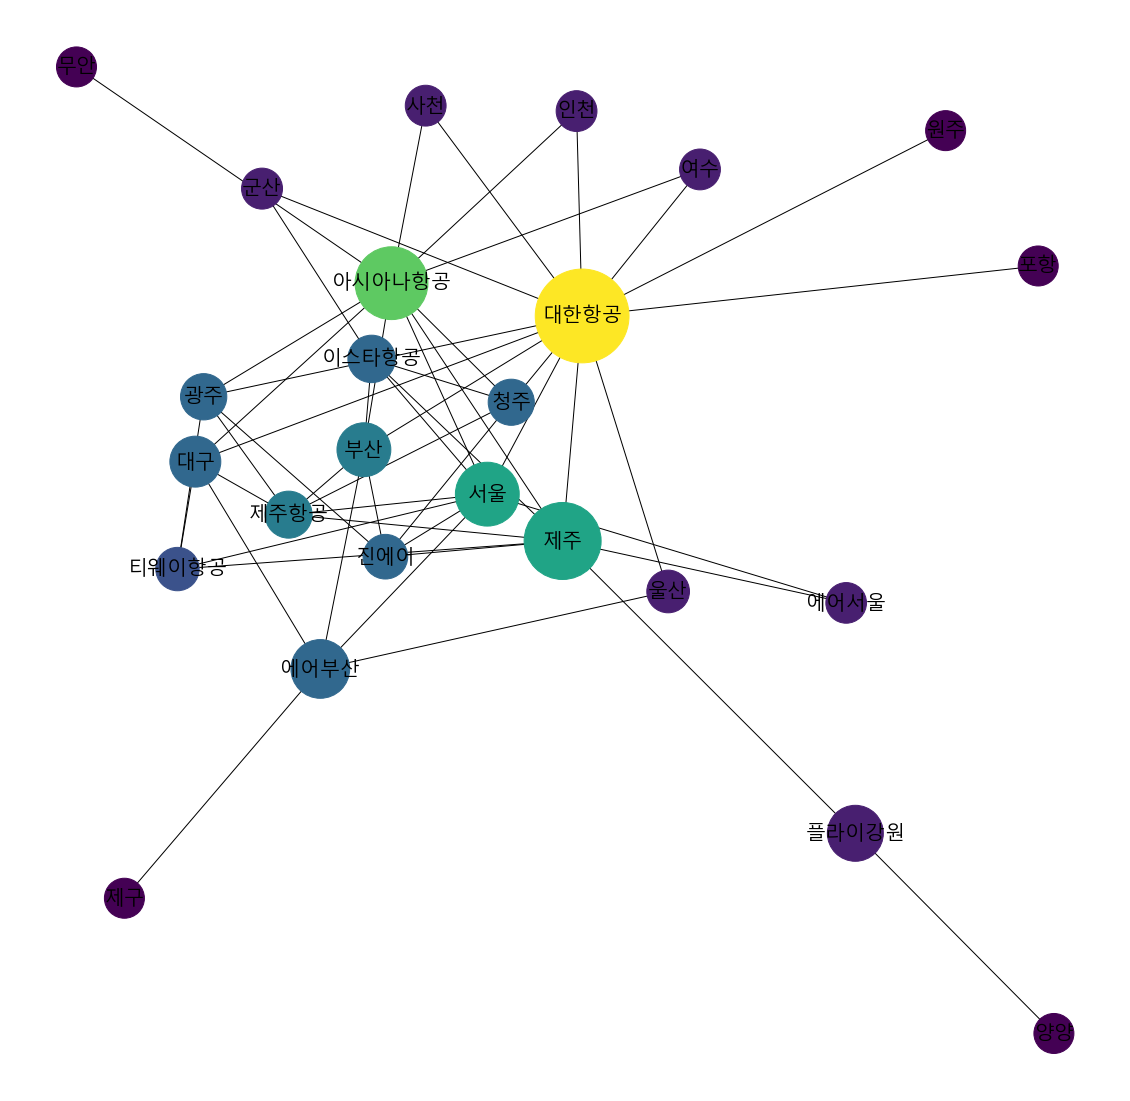

In [33]:
# 연결정도 중심성 그래프를 통해 국내선 중 대한항공의 취항도시가 가장 많은 것을 알 수 있다.
# 서울과 제주로 운항하는 항공사들이 많다.

pos = nx.spring_layout(a)
aCent = nx.betweenness_centrality(a, normalized=True, endpoints=True)
node_color = [20000.0 * a.degree(v) for v in a]
node_size =  [v * 20000 for v in aCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(a, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size, 
                 font_family=font_name,font_size=20)
plt.axis('off');

### 2.2. wadiz - 성공한 프로젝트 특징

In [17]:
wadiz_df = pd.read_csv("C:/Users/user/Desktop/강의자료 모음/20-2학기/비즈니스 애널리틱스(캡스톤디자인)/wadiz_popluar1219.csv", encoding='CP949')
wadiz_df.head(10)

,Unnamed: 0,title,category,company,funding start,funding end,funding period,goal amount,amount,achievement,backer2,like1,community
0,1,"베이직북14 : 대기업 노트북과 비교해보세요, 20만원대 파격 울트라북!",테크·가전,베이직스,2019-01-22,2019-02-21,30,5000000,2023334000,404.66,6178,5600,커뮤니티 1665
1,2,"가격마저 놀랍다! 디자이너 캐리어 & 백팩, 샤플 Dr.Nah",디자인소품,샤플,2017-06-20,2017-07-19,29,5000000,1516637609,303.32,22492,2979,커뮤니티 3589
2,3,음악이 들리는 선글라스 정글 팬써,여행·레저,정글 (Zungle),2017-02-21,2017-04-02,40,20000000,1284448500,64.22,7669,1841,커뮤니티 2629
3,4,[패션ㆍ잡화 역대 1위 펀딩] 99%를 위해 만들어진 1%의 램스킨 자켓,패션·잡화,CCC COMPANY,2019-07-31,2019-08-18,18,10000000,1118328692,111.83,7118,2485,커뮤니티 248
4,5,"[베이직북14 마지막앵콜] 20만원대 가성비갑 울트라북, 베이직북14!",테크·가전,베이직스,2019-05-29,2019-06-23,25,10000000,1067082210,106.70,3301,2881,커뮤니티 168
5,6,세계최초의 폴딩형 역삼륜 전동킥보드 - TRANSBOARD,스포츠·모빌리티,(주)머케인,2016-11-07,2016-12-06,29,30000000,758523201,25.28,2014,760,커뮤니티 1067
6,7,[진짜 '로봇'다운 로봇청소기] eufy 물걸레 하이브리드 로보백 G10,테크·가전,(주)디스티팩토리,2019-10-21,2019-12-01,41,10000000,746569500,74.65,3532,2263,커뮤니티 362
7,8,유.무선 이어폰 장점을 결합한 하이브리드 무선이어폰 PaMu Slide,테크·가전,패드메이트 프로젝트 팀,2019-09-26,2019-10-27,31,10000000,687742211,68.77,6085,4340,커뮤니티 1558
8,9,반려동물의 건강과 멘탈 케어를! '바램 펫 피트니스 로봇',반려동물,(주)바램시스템,2018-11-06,2018-12-09,33,5000000,638581220,127.71,9800,2896,커뮤니티 2229
9,10,"한번더! 올겨울 88,000원으로 더 따뜻하게, 스켈리도 롱패딩",스포츠·모빌리티,스켈리도,2018-09-19,2018-10-21,32,3000000,566271501,188.75,4368,1575,커뮤니티 1195


In [18]:
w = nx.Graph()

In [19]:
w = nx.from_pandas_edgelist(wadiz_df, source='company', target='category')
print(nx.info(w))

Name: 
Type: Graph
Number of nodes: 159
Number of edges: 150
Average degree:   1.8868


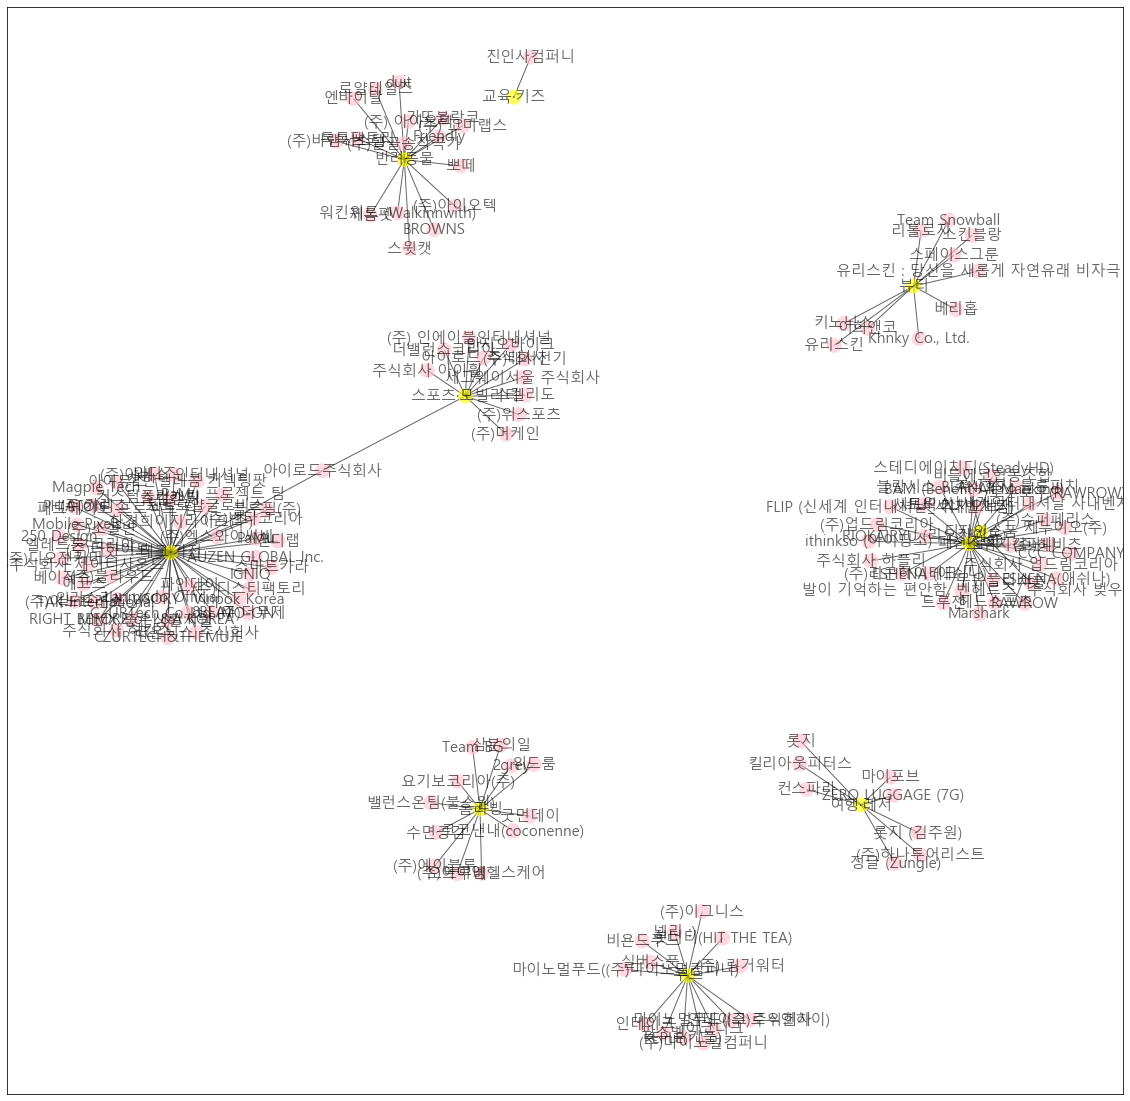

In [20]:
# 네트워크로 표현한 결과, 테크.가전 카테고리의 프로젝트들이 성공률이 더 높다는 걸 알 수 있다.

colors = []

for node in w:
    if node in wadiz_df["category"].values:
        colors.append("yellow")
    else: colors.append("pink")

plt.figure(figsize=(20,20))
pos=nx.spring_layout(w, k=0.15)
nx.draw_networkx(w,pos,node_size=25,node_color=colors, font_family=font_name, font_size=15, alpha=0.6, linewidths=10)
plt.show()